## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress    
    



In [32]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [33]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [34]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [35]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [36]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [37]:
# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,on=["Mouse ID"],how="left")
df.head(len(df))
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [39]:
# Checking the number of mice.
mice_number=df['Mouse ID'].nunique()
mice_number

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=df[df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice.head(len(df))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ID = df.loc[df["Mouse ID"]=="g989",:]
duplicate_mouse_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=df.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [43]:
# Checking the number of mice in the clean DataFrame.
mice_number2=clean_df['Mouse ID'].nunique()
mice_number2

249

In [44]:
duplicate_mice2=clean_df[clean_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice2.head(len(clean_df))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [45]:
duplicate_mouse_ID2 = df.loc[df["Mouse ID"]=="g989",:]
duplicate_mouse_ID2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [47]:
grouped_df=clean_df.groupby(["Drug Regimen"])
grouped_df

In [48]:
#mean
avg=grouped_df['Tumor Volume (mm3)'].mean()

#median
median=grouped_df['Tumor Volume (mm3)'].median()

#Variance
variance=grouped_df['Tumor Volume (mm3)'].var()

#Standard Deviation
std=grouped_df['Tumor Volume (mm3)'].std()

#standard error of mean (SEM)
sem=grouped_df['Tumor Volume (mm3)'].sem()

#DataFrame
summary=pd.DataFrame({
    "Mean of Tumor Volume":avg,
    "Median of Tumor Volume": median,
    "Variance of Tumor Volume": variance,
    "Standard Deviation of Tumor Volume":std,
    "SEM of Tumor Volume":sem
    
})
summary

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2=grouped_df['Tumor Volume (mm3)'].agg(["mean",'median','var','std','sem'])
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas=df2["Drug Regimen"].value_counts().plot.bar(width=0.5)

bar_plot_pandas.set_xlabel("Drug Regimen")
bar_plot_pandas.set_ylabel("Timepoint")
bar_plot_pandas.set_title("Timepoints vs Drug Regimen")

plt.show()


NameError: name 'df2' is not defined

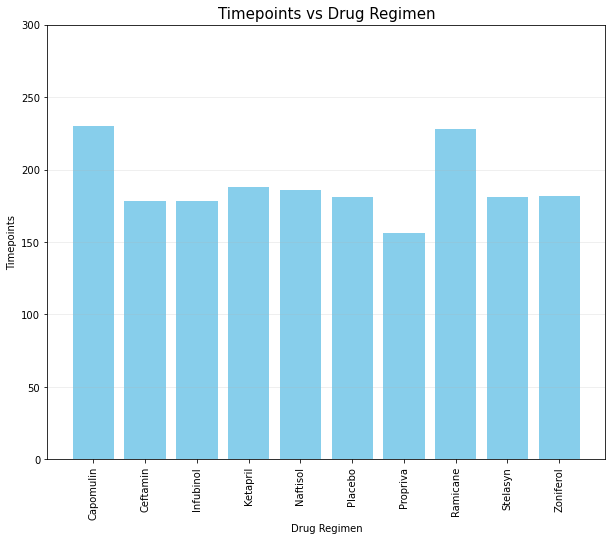

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# step 1, get the data
y = grouped_df["Timepoint"].count()
x = y.index

# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y, color="skyblue")

# step 3, customization
plt.title("Timepoints vs Drug Regimen",fontsize=15)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Timepoints",fontsize=10)
plt.grid(axis="y", alpha=0.25)
plt.xticks(rotation=90)

# Sets the x limits of the current chart


# Sets the y limits of the current chart
plt.ylim(0, 300)

# step 4, saving/showing
plt.show()


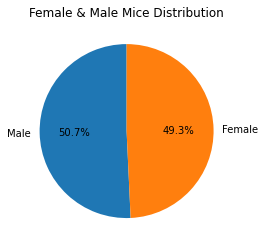

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender=clean_df["Sex"].value_counts()

pie_plot_pandas = mice_gender.plot.pie(autopct="%1.1f%%", startangle=90, title='Female & Male Mice Distribution')
pie_plot_pandas.set_ylabel("")

plt.show()

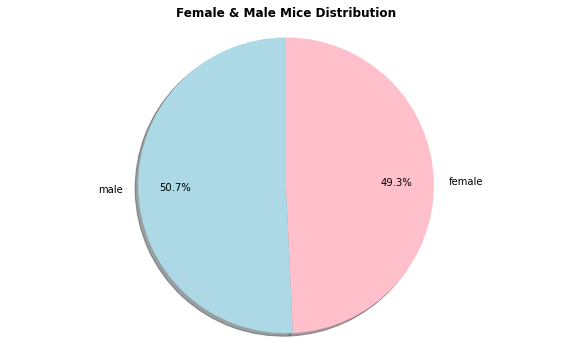

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# step 1, get the data
gender=["male","female"]
mice_gender=clean_df["Sex"].value_counts()

# for customization
colors = ["lightblue","pink"]
explode = (0, 0)

# step 2, init the plot
fig = plt.figure(figsize=(10,6))
plt.pie(mice_gender, labels=gender, colors=colors, explode=explode, autopct="%1.1f%%", pctdistance=0.75, shadow=True, startangle=90)

# step 2.5, draw a circle
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig.gca().add_artist(centre_circle)

# step 3 - customization
plt.title("Female & Male Mice Distribution", fontweight="bold")
plt.axis("equal")

# step 4 - show the pie
plt.show()


## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [55]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [56]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge = pd.merge(max_timepoint , clean_df, on=(["Mouse ID","Timepoint"]))
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [57]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [59]:
 treatement_loc = merge.loc[merge['Drug Regimen']== treatment,:]

NameError: name 'treatment' is not defined

In [60]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
 #Capomulin, Ramicane, Infubinol, and Ceftamin
treatments =['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatement_loc = merge.loc[merge['Drug Regimen']== treatment,:]
    tumor_vol_per_treatement = treatement_loc['Tumor Volume (mm3)']
    #add tumor volume data in empty list
    tumor_vol_data.append(tumor_vol_per_treatement)

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3     
       
    # Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)
      

#Print values 
print(f"For {treatments[0]}: Values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]}: Values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]}: Values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]}: Values below {lower_bound3} and above {upper_bound3} could be outliers")
    

For Capomulin: Values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane: Values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol: Values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin: Values below 25.355449580000002 and above 87.66645829999999 could be outliers


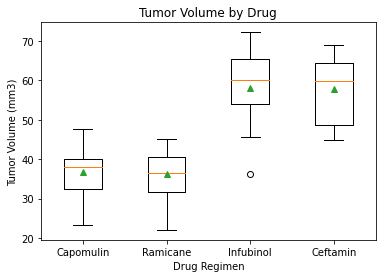

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, showmeans=True)

plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)
plt.xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [65]:
#choose a mouse mouse b128
b128_capomulin=capomulin.loc[capomulin["Mouse ID"]=="b128",:]
b128_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


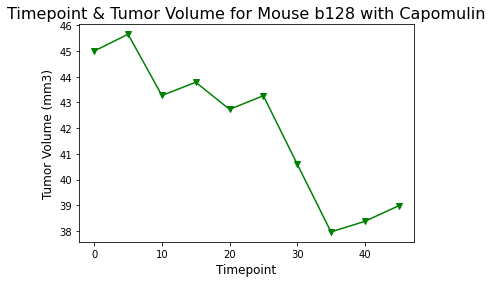

In [66]:
#Create a chart

# step 1 - extract data
x = b128_capomulin["Timepoint"]
y = b128_capomulin["Tumor Volume (mm3)"]

# step 2 - create the barebones plot - init plot
plt.plot(x, y, marker= "v", color="green")

# step 3 - customization
plt.xlabel("Timepoint", fontsize = 12)
plt.ylabel("Tumor Volume (mm3)", fontsize = 12)
plt.title("Timepoint & Tumor Volume for Mouse b128 with Capomulin", fontsize=16)
plt.xlim=(0,50)
plt.ylim=(0,50)


# step 4 - show/save the graph
plt.show()

In [67]:
x = capomulin["Tumor Volume (mm3)"].mean
x

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64>

In [68]:
y = capomulin["Weight (g)"].mean
y

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       22
226     21
227     17
228     17
229     21
        ..
1854    23
1859    23
1878    24
1888    25
1889    17
Name: Weight (g), Length: 230, dtype: int64>

In [69]:
grouped_mouse_capomulin=capomulin.groupby(capomulin["Mouse ID"])
grouped_mouse_capomulin

In [70]:
x1 = grouped_mouse_capomulin["Tumor Volume (mm3)"].mean()
x1

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [71]:
y1 = grouped_mouse_capomulin["Weight (g)"].mean()
y1

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

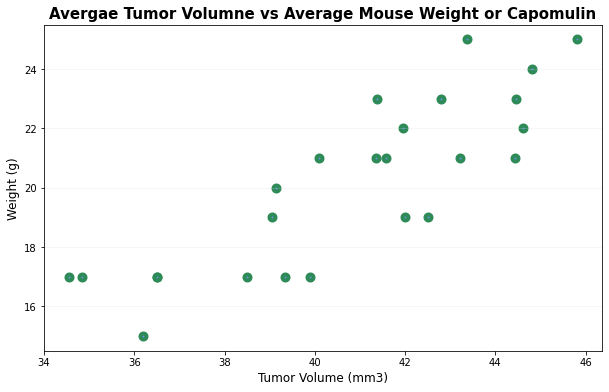

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# step 1
x1 = grouped_mouse_capomulin["Tumor Volume (mm3)"].mean()
x1
y1 = grouped_mouse_capomulin["Weight (g)"].mean()
y1

# step 2
fig = plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, facecolor="cornflowerblue", edgecolor="seagreen", linewidth=4)

# step 3
plt.title("Avergae Tumor Volumne vs Average Mouse Weight or Capomulin", fontsize=15, fontweight="bold")
plt.xlabel("Tumor Volume (mm3)", fontsize=12)
plt.ylabel("Weight (g)", fontsize=12)


plt.grid(axis="y", alpha=0.25, color="lightgrey")

# step 4
plt.show()


## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [74]:
x1 = grouped_mouse_capomulin["Tumor Volume (mm3)"].mean()
x1

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [75]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x1,y1)
correlation

(0.8419363424694721, 1.3225722434712388e-07)

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


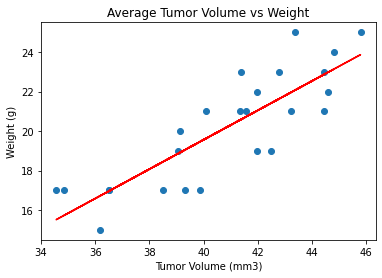

In [80]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x1,y1)

# Print the result of above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Average Tumor Volume vs Weight')

plt.show()


In [ ]:
##Analysis
#With the positive correlation of 0.84, the average weight and average tumor have a strong positive relationship. The more the weight is, the higher the tumor volume is.
##Based on the summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen, mean and median are close to each other which indicates that the dataset has a symmetrical distribution.
#The gender distribution of the mice is 50.7 and 49.3 showing the gender may not directly affect the experiment results.